# Predator-Prey models, part I

## Lotka-Volterra model of population dynamics

Volterra presented his model on [Nature 118(2972):558-560, 1926](https://www.nature.com/articles/118558a0.pdf). The paper is actually an English summary of a work published in *Memorie della R. Accademia dei Lincei, VI(II):31:113, 1926* and reproduced here: [Variazioni e fluttuazioni del numero d'individui in specie animali conviventi](https://www.liberliber.it/mediateca/libri/v/volterra/variazioni_e_fluttuazioni/pdf/volterra_variazioni_e_fluttuazioni.pdf) (Section 2)

Lotka has developed an analogous model, published in 1925, in the book _"Principles of Physical Biology"_.


### Growth of a single population

For any population $P$ of individuals who are generated and die, we have:

$  \frac{dP}{dt} = \beta_P\cdot P - \mu_P\cdot P = (\beta_P - \mu_P)\cdot P = \epsilon_P\cdot P $



where $\beta_P$ is the *birth rate* of the population and $\mu_P$ the *mortality rate*. $\epsilon_P = (\beta_P - \mu_P)$ is the **growth rate** of the population $P$.

The differential equation has a closed form solution: $P(t) = P(0)\cdot e^{\epsilon_P\cdot t}$.

How long does it take to double the population? We must find $t^*$ such that: $P(0)\cdot e^{\epsilon_P\cdot t^*} = 2\cdot P(0)$.

$   t^* = \frac{\ln{2}}{\epsilon_P} \approx \frac{0.7}{\epsilon_P} $


Thus, $\epsilon_P = 0.7$ means that the population approximately doubles every time unit.

#### Exercise 1

Define a function that takes a `Axes` and uses it for a plot of the closed form solution.

In [2]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

In [3]:
growth_plot(ax, np.linspace(0, 5, 100), .3, 10)

NameError: name 'growth_plot' is not defined

In [4]:
time=np.linspace(0, 5, 100) #inizio,fine,divisioni

In [5]:
def growth_plot(ax:plt.Axes,
                t: np.ndarray, 
                epsilon:float , P0: int)-> np.ndarray : 
                
                
    y=P0*(np.exp((epsilon)*t))
    ax.plot(time,y,label='exact')         
    
    return y
    
            
    

In [16]:
x=np.linspace(0,5,100)
a=0.7*x
a

array([0.        , 0.03535354, 0.07070707, 0.10606061, 0.14141414,
       0.17676768, 0.21212121, 0.24747475, 0.28282828, 0.31818182,
       0.35353535, 0.38888889, 0.42424242, 0.45959596, 0.49494949,
       0.53030303, 0.56565657, 0.6010101 , 0.63636364, 0.67171717,
       0.70707071, 0.74242424, 0.77777778, 0.81313131, 0.84848485,
       0.88383838, 0.91919192, 0.95454545, 0.98989899, 1.02525253,
       1.06060606, 1.0959596 , 1.13131313, 1.16666667, 1.2020202 ,
       1.23737374, 1.27272727, 1.30808081, 1.34343434, 1.37878788,
       1.41414141, 1.44949495, 1.48484848, 1.52020202, 1.55555556,
       1.59090909, 1.62626263, 1.66161616, 1.6969697 , 1.73232323,
       1.76767677, 1.8030303 , 1.83838384, 1.87373737, 1.90909091,
       1.94444444, 1.97979798, 2.01515152, 2.05050505, 2.08585859,
       2.12121212, 2.15656566, 2.19191919, 2.22727273, 2.26262626,
       2.2979798 , 2.33333333, 2.36868687, 2.4040404 , 2.43939394,
       2.47474747, 2.51010101, 2.54545455, 2.58080808, 2.61616

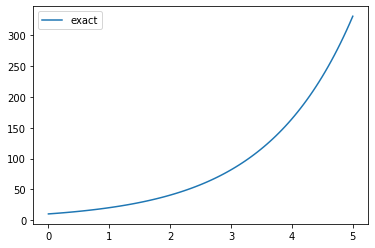

In [7]:
fig, ax = plt.subplots()
y=growth_plot(ax,time, .7, 10)

_=ax.legend()

#### Exercise 2

Plot together the *birth* ($1.0$), *mortality* ($0.3$), and *growth* rate. Reuse the function defined in exercise 1, add a legend to the plot.

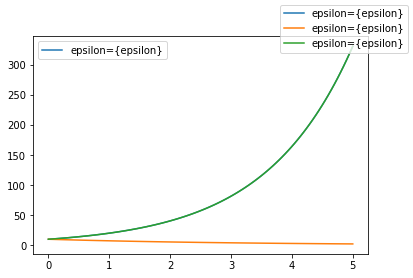

In [30]:
growth_plot(ax, time, -.3, 10)
growth_plot(ax, time, .7, 10)
fig.legend()
fig

Having a closed form is handy, but we can actually approximate it just by leveraging on the derivative ([Euler method](https://en.wikipedia.org/wiki/Euler_method)), since $\lim_{\Delta t \to 0} f(t + \Delta t) = f(t) + dt\cdot\frac{df}{dt}$.


#### Exercise 3

Write a function to compute the Euler approximation giving the values of $f(0)$ and the derivative function.

In [31]:
from typing import Callable
    
def approx_euler(t: np.ndarray, f0: float, dfun: Callable[[float], float]) -> np.ndarray:
    """Compute the Euler approximation of a function on times t, with derivative dfun.
    """
    
    res = np.zeros_like(t)

    res[0] = f0

    for i in range (1, len(t)):
        dt = t[i] - t[i-1]
        res[i] = res[i-1] + dt * dfun(res[i-1])

    return res
    
    pass

In [32]:
def dp (f: float, epsilon: float = .7) -> float:
    return epsilon * f

population = approx_euler(time, 10, dp)

NameError: name 'population' is not defined

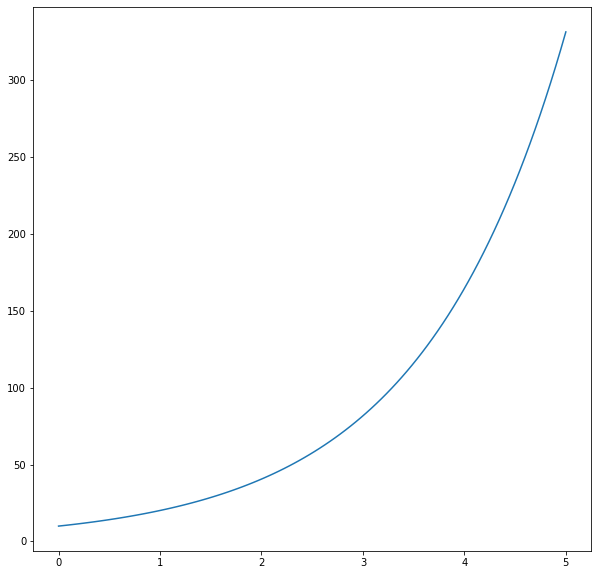

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
exact = growth_plot (ax, time, .7, 10)
ax.plot(time, population, label='Euler Approximation')
fig.legend()

#### Exercise 4

Compare the results of an Euler approximation with a $\Delta t = 0.01$ and the closed form solution by plotting both.


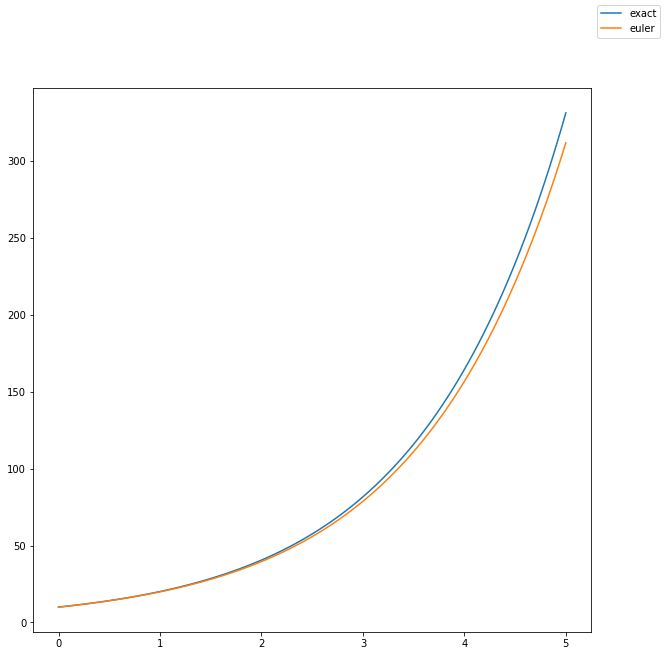

In [39]:
euler=approx_euler(time,10,dp)
fig, ax = plt.subplots(figsize=(10,10))
exact = growth_plot (ax, time, .7, 10)
ax.plot(time, euler, label='euler')
fig.legend()

#### Exercise 5

Plot the error $|y-y'|$ between the closed form solution and the Euler approximation in the same setting as the previous exercise.

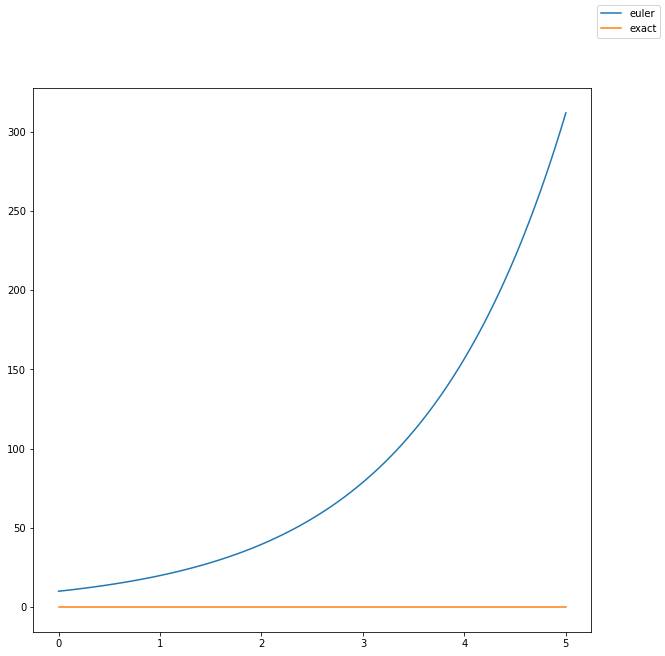

In [43]:
exact=population-euler
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(time, euler, label='euler')
ax.plot(time, exact, label='exact')
fig.legend()

#### Exercise 6

Write a function for this other approximation approach: [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), in its most trivial version RK4:

$y_{n+1} = y_n + \frac{1}{6}h\left(k_1 + 2k_2 + 2k_3 + k_4 \right)$

$t_{n+1} = t_n + h$

$k_1 = \ f(t_n, y_n)$

$k_2 = \ f\left(t_n + \frac{h}{2}, y_n + h\frac{k_1}{2}\right)$ 

$k_3 = \ f\left(t_n + \frac{h}{2}, y_n + h\frac{k_2}{2}\right)$

$k_4 = \ f\left(t_n + h, y_n + hk_3\right)$

In [ ]:
def approx_rk4(t: np.ndarray, f0: float, dfun: Callable[[float], float]) -> np.ndarray:
    """Compute the Runge-Kutta approximation of a function on times t, with derivative dfun.
    """
    pass

#### Exercise 7

Compare the results of an RK4 approximation with a $\Delta t = 0.01$ and the closed form solution by plotting both.


In [ ]:
pass

#### Exercise 8

Plot the error $|y-y'|$ between the closed form solution and the RK4 approximation in the same setting as the previous exercise.

In [ ]:
pass